# Prova eDB 002

---

Importando bibliotecas necessárias para o desenvolvimento desta prova

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Importando dados em formato .xlsx para realizar a prova:
- importando apenas a primeira pasta do arquivo
- ignorando as primeiras 19 linhas do arquivo (contando a partir de 0)
- identificando os valores faltantes
- discriminando a primeira coluna como o índice dos dados
- renomeando as colunas para snake_case
- selectionando apenas as colunas desejadas
- convertendo o tipo das colunas para um mais apropriado

In [89]:
ice_cream_sales = pd.read_excel(
    io='../data/eDB-002 - Exercicio - REG LINENAR.xlsx',
    sheet_name='Question 1',
    skiprows=18,
    na_filter=True,
    na_values=['<NA>', '?'],
    names=['date', 'temperature_fahrenheit', 'total_sales', 'temperature_celsius'],
    usecols=['date', 'total_sales', 'temperature_celsius'],
    dtype={
        'total_sales': pd.Float64Dtype(),
        'temperature_celsius': pd.Int64Dtype(),
    },
)

Removendo linhas com dados faltantes

In [90]:
ice_cream_sales.dropna(inplace=True)

Visualizando dados

In [94]:
ice_cream_sales.head()

,date,total_sales,temperature_celsius,day_of_week
0,2004-03-01,38911.0,24,0
1,2004-03-02,36337.258058,23,1
2,2004-03-03,35728.110238,22,2
3,2004-03-04,36945.386701,24,3
4,2004-03-05,36335.166206,23,4


Descrevendo dados

In [92]:
ice_cream_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7175 entries, 0 to 7174
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 7175 non-null   datetime64[ns]
 1   total_sales          7175 non-null   Float64       
 2   temperature_celsius  7175 non-null   Int64         
dtypes: Float64(1), Int64(1), datetime64[ns](1)
memory usage: 238.2 KB


## 1) Criação de variaveis

### 1.1) Crie uma variavel chamada: Dia_da_semana e popule-na com (dom, seg, ter, etc)

**OBS**: por se tratar de uma variável qualitativa ordinal, assim como para facilitar a compreensão dos dados pelo modelo,
preferiu-se adotar numeros naturais de 0 a 6, em que 0 representa a segunda-feira; 6, domingo.

In [93]:
ice_cream_sales['day_of_week'] = ice_cream_sales['date'].dt.day_of_week
ice_cream_sales.head()

,date,total_sales,temperature_celsius,day_of_week
0,2004-03-01,38911.0,24,0
1,2004-03-02,36337.258058,23,1
2,2004-03-03,35728.110238,22,2
3,2004-03-04,36945.386701,24,3
4,2004-03-05,36335.166206,23,4


### 1.2) Crie uma variavel chamada: Mês_venda e popule-na com (jan,fev,mar,abr, etc)

**OBS**: por se tratar de uma variável qualitativa ordinal, assim como para facilitar a compreensão dos dados pelo modelo,
preferiu-se adotar numeros naturais de 1 a 12, em que 1 representa Janeiro; 12, Dezembro.

In [95]:
ice_cream_sales['month_of_year'] = ice_cream_sales['date'].dt.month
ice_cream_sales.head()

,date,total_sales,temperature_celsius,day_of_week,month_of_year
0,2004-03-01,38911.0,24,0,3
1,2004-03-02,36337.258058,23,1,3
2,2004-03-03,35728.110238,22,2,3
3,2004-03-04,36945.386701,24,3,3
4,2004-03-05,36335.166206,23,4,3


## 2) Façam as análises univariadas

### 2.1) análises descritivas

In [96]:
ice_cream_sales.drop(columns=['date', 'day_of_week', 'month_of_year']).describe()

,total_sales,temperature_celsius
count,7175.0,7175.0
mean,40154.737143,25.427735
std,5642.698863,6.293561
min,28238.199588,11.0
25%,36365.003731,21.0
50%,39052.56443,24.0
75%,45451.687339,31.0
max,55022.578795,42.0


### 2.2)  analise graficas: grafico de barras, histogramas, etc

Gráfico de violino com boxplot para descrever a distribuição de vendas de sorvete, em reais, no conjunto de dados

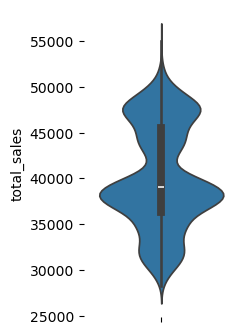

In [10]:
plt.subplots(figsize=(2, 4))

sns.violinplot(
    data=ice_cream_sales,
    y='total_sales',
)

sns.despine(left=True, bottom=True)

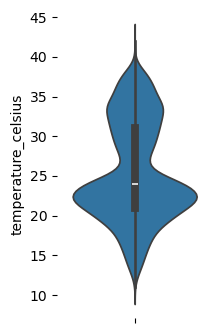

In [11]:
plt.subplots(figsize=(2, 4))

sns.violinplot(
    data=ice_cream_sales,
    y='temperature_celsius',
)

sns.despine(left=True, bottom=True)

Analise a distribuição de dados em relação ao total de vendas por meio de uma função de densidade

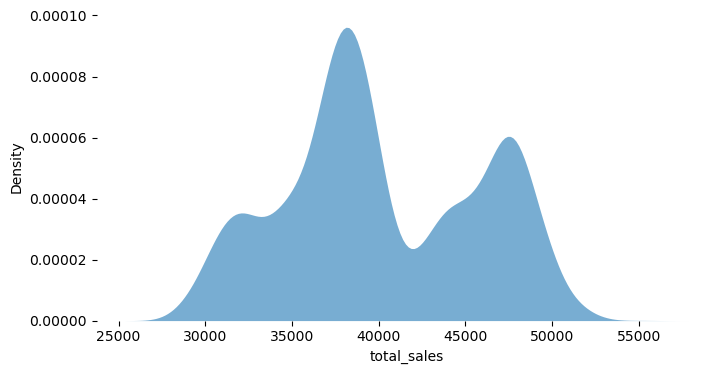

In [12]:
plt.subplots(figsize=(8, 4))

sns.kdeplot(
   data=ice_cream_sales,
   x='total_sales',
   fill=True,
   alpha=.6,
   linewidth=0,
)

sns.despine(left=True, bottom=True)

## 3) Façam as análises bi-variadas

### 3.1) Análise de vendas em relação a datas do ano

Analise sobre total de vendas em relação ao mês do ano

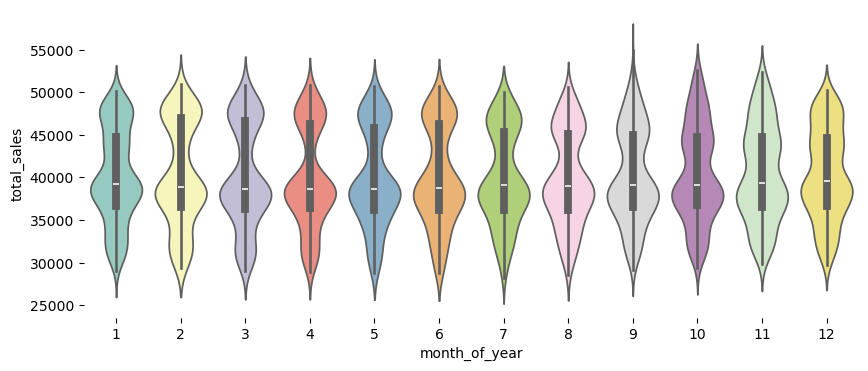

In [13]:
plt.subplots(figsize=(10, 4))

sns.violinplot(
    data=ice_cream_sales,
    x='month_of_year',
    y='total_sales',
    hue='month_of_year',
    palette='Set3',
    legend=False,
)

sns.despine(left=True, bottom=True)

Analise sobre total de vendas em relação ao dia da semana

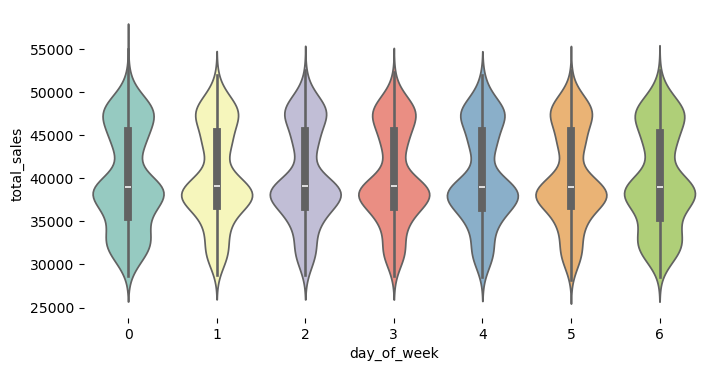

In [97]:
plt.subplots(figsize=(8, 4))

sns.violinplot(
    data=ice_cream_sales,
    x='day_of_week',
    y='total_sales',
    hue='day_of_week',
    palette='Set3',
    legend=False,
)

sns.despine(left=True, bottom=True)

### 3.2)  analise graficas bi variadas: Grafico de dispersão (Vendas(y) x Temperatura (x))

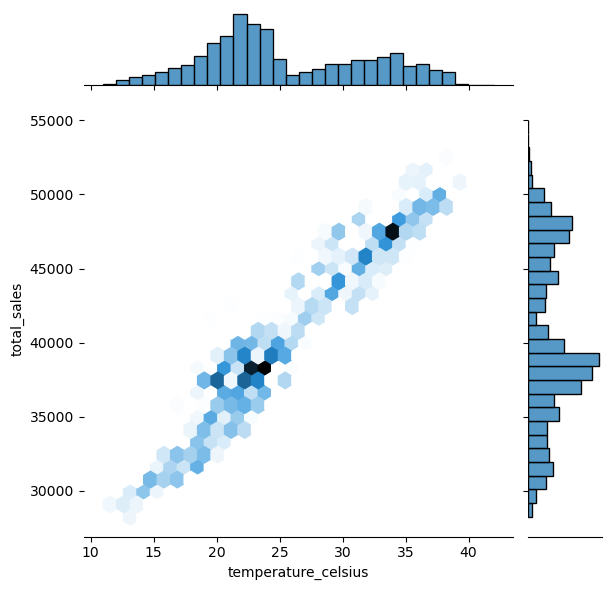

In [98]:
sns.jointplot(
   data=ice_cream_sales,
   y='total_sales',
   x='temperature_celsius',
   kind='hex',
   height=6,
)

sns.despine(left=True)

### 3.3) calcule a correlação entre as variaveis Temperatura e total de ites vendidos

In [16]:
correlations = ice_cream_sales.corr(method='pearson')
correlations.loc['total_sales', 'temperature_celsius']

0.9661052487332045

## 4) definam a equacao através de uma Regressão Linear

Selecionando entrada do modelo

In [26]:
X = ice_cream_sales.loc[:, ['date', 'temperature_celsius']]
y = ice_cream_sales.loc[:, ['total_sales']].values.ravel()

Dividindo dados entre conjunto de trainamento (80%) e teste (20%)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Criando função para extrair dia da semana e dia do mês da data de aferição

In [28]:
def get_date_features(X: pd.DataFrame) -> pd.DataFrame:
    """
    A function to extract the day of week and the month of the year
    from a given date
    """
    X['day_of_week'] = X['date'].dt.day_of_week
    X['month_of_year'] = X['date'].dt.month

    X = X.drop(columns=['date'])
    
    return X

date_features = FunctionTransformer(get_date_features, validate=False)

Criando conjunto de transformações sequenciais dos dados, isto é, primeiro se extrai características baseadas na data de aferição, é aplicado um normalizador (de 0 a 1) em todos os dados

In [29]:
pipe = Pipeline([
    ('date_features', date_features),
    ('normalizar', MinMaxScaler()),
])

Salvando pipeline de dados

In [52]:
joblib.dump(pipe, '../pipeline/ice-cream-sales-pipeline.joblib')

['../pipeline/ice-cream-sales-pipeline.joblib']

Ajustando dados de treinamento e aplicando transformações, posteriormente transformando dados de teste

In [67]:
X_train_pre = pipe.fit_transform(X_train)
X_test_pre = pipe.transform(X_test)

Treinando modelo de regressão linear com penalização L1 e L2, conhecido como ElasticNet

In [68]:
grid_serch = GridSearchCV(
    estimator=Lasso(), 
    param_grid={'alpha': np.arange(0.001, 10.001, 0.001)}, 
    cv=10,
    scoring='neg_root_mean_squared_error', 
    verbose=3,
    n_jobs=-1, 
    refit=True
)

In [69]:
grid_serch.fit(X_train_pre, y_train)

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])},
             scoring='neg_root_mean_squared_error', verbose=3)

Melhor modelo

In [73]:
grid_serch.best_params_

{'alpha': 2.2119999999999997}

In [74]:
optimal_lasso = grid_serch.best_estimator_

Salvando melhor modelo

In [75]:
joblib.dump(optimal_lasso, '../model/optimal-lasso.joblib')

['../model/optimal-lasso.joblib']

Realizando predições de total de vendas

In [76]:
y_train_pred = optimal_lasso.predict(X_train_pre)
y_test_pred = optimal_lasso.predict(X_test_pre)

Métrica de R² para conjunto de trainamento

In [77]:
r2_score(y_train, y_train_pred)

0.9333492313270059

Métrica de R² para conjunto de teste

In [79]:
r2_score(y_test, y_test_pred)

0.934344994429361

coeficiente de interseção

In [80]:
optimal_lasso.intercept_

27803.72639205525

coeficientes para cada característica (X)

In [81]:
feature_coef = pd.DataFrame({
    'feature_names': ['temperature_celsius', 'day_of_week', 'month_of_year'],
    'coefficient': optimal_lasso.coef_
})

feature_coef

,feature_names,coefficient
0,temperature_celsius,26801.243854
1,day_of_week,0.000000
2,month_of_year,-238.322497


## 5) Prevejam qual será o total a ser faturado com as vendas (em R$) na data de 30/out/23, sabendo que a previsao do tempo aponta para 18o C

Criando modelo automatizado que pega uma entrada de data e temperatura, transforma os dados e depois faz a predição

In [82]:
loaded_pipe = joblib.load('../pipeline/ice-cream-sales-pipeline.joblib')
loaded_model = joblib.load('../model/optimal-lasso.joblib')

In [83]:
def predict_sales(input_data: list[list]) -> float:
    """
    A function to prepare the raw data to a proper way for prediction
    """

    instances = pd.DataFrame(data=input_data, columns=['date', 'temperature_celsius'])

    instances['date'] = instances['date'].astype('datetime64[ns]')
    instances['temperature_celsius'] = instances['temperature_celsius'].astype(pd.Int64Dtype())

    instances_preprocessed = loaded_pipe.transform(instances)
    prediction = loaded_model.predict(instances_preprocessed)

    return prediction

In [84]:
input_data = [['30-10-2023', 18]]
predict_sales(input_data)

array([33660.62903184])

## 6) Escreva a sua conlusão

## 7) Escreva a sua recomendação para o Diretor Fianceiro desta empresa